<a href="https://colab.research.google.com/github/Mohini-More/Machine-learning/blob/main/convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**convolutional Neural Network**

In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1098240318781792639
xla_global_id: -1
]


In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


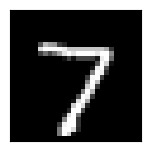

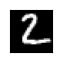

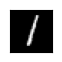

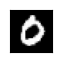

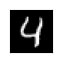

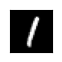

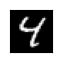

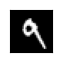

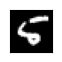

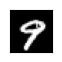

In [5]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  plt.show()
  plt.close()

In [6]:
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [7]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [8]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')


x_train /=255
x_test /=255


In [9]:
classes=10
y_train=to_categorical(y_train,classes)
y_test=to_categorical(y_test,classes)

#seeling update shape
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)


x_train shape (60000, 28, 28, 1)
y_train shape (60000, 10)
x_test shape (10000, 28, 28, 1)
y_test shape (10000, 10)


**Building the CNN**

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [30]:
img_rows ,img_cols , channels=28,28,1
filters=[6,32,80,120]

classes=10

In [33]:
#create model
model=Sequential()
model.add(Conv2D(filters[0],(3,3),padding='same' , activation='relu' ,input_shape=(img_rows ,img_cols , channels) ))
model.add(MaxPooling2D(pool_size=(2,2))) #for reducing image size
#(dim + pad-kernel)/2 (28 +3 -3)/ 2 =14
model.add(Conv2D(filters[1],(2,2),padding='same' , activation='relu'  ))
model.add(MaxPooling2D(pool_size=(2,2)))
#(dim + pad-kernel)/2 (14+2 -2)/ 2 =7
model.add(Conv2D(filters[2],(2,2),padding='same' , activation='relu'  ))
model.add(MaxPooling2D(pool_size=(2,2)))
#(dim + pad-kernel)/2 (7+2 -2)/ 2 =3
model.add(Conv2D(filters[3],(2,2),padding='same' , activation='relu'  ))
model.add(MaxPooling2D(pool_size=(2,2)))
#(dim + pad-kernel)/2 (3+2 -2)/ 2 =1
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(classes,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 6)           │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 32)          │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 7, 80)            │          10,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 3, 3, 80)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 120)           │          38,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 1, 1, 120)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,094 (226.93 KB)

 Trainable params: 58,094 (226.93 KB)

 Non-trainable params: 0 (0.00 B)

**Training the CNN**

In [35]:
#training model
model.fit(x_train,y_train,validation_split=0.2, epochs=15, batch_size=64, verbose=1)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.2483 - loss: 2.2335 - val_accuracy: 0.6490 - val_loss: 1.0635
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.7239 - loss: 0.8241 - val_accuracy: 0.8884 - val_loss: 0.3322
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.8954 - loss: 0.3275 - val_accuracy: 0.9276 - val_loss: 0.2161
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9304 - loss: 0.2188 - val_accuracy: 0.9388 - val_loss: 0.1861
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9441 - loss: 0.1743 - val_accuracy: 0.9317 - val_loss: 0.2004
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9553 - loss: 0.1415 - val_accuracy: 0.9582 - val_loss: 0.1298
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.9613 - loss: 0.1201 - val_accuracy: 0.9643 - val_loss: 0.1072
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.9684 - loss: 0.1017 - 

**Testing model**

In [37]:
# import libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# predict probabilities set train model
y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5 ,1,0)


# calculate & test accuracy using predict & true label
test_accuracy = accuracy_score(y_test,y_pred)
print('\n test accuracy:{}'.format(test_accuracy))


 test accuracy:0.9743


In [39]:
#define a mask selecting a range of indices(20 ,49)
mask =range(20,50)

#test set visualization
x_valid=x_train[0:20]
actual_labels =y_test[0:20]

#predict probabilities for validation sample
y_pred_probs_valid=model.predict(x_valid)
y_pred_valid=np.where(y_pred_probs_valid > 0.5 ,1,0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
